# Camera Calibration

In [3]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

# number of rows and columns in the chessboard
crows = 9
ccols = 6

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((ccols*crows,3), np.float32)
print (objp.shape)

mesh = np.mgrid[0:crows, 0:ccols]
meshT = mesh.T
# assign x-y co-ordinates
objp[:,:2] = meshT.reshape(-1,2)

(54, 3)


In [4]:
import matplotlib.image as mpimg

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')
image_save_dir = 'output_images'
# Step through the list and search for chessboard cor(objp)ners
for idx, fname in enumerate(images):
    img = mpimg.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (crows,ccols), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (crows,ccols), corners, ret)
        write_name = '/'.join([image_save_dir, 'corners_found'+str(idx)+'.jpg'])
        
        mpimg.imsave(write_name, img)

In [5]:
# Calibrate camera
import random 

idx = random.randint(0, len(images) - 1)
img = mpimg.imread(images[idx])
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

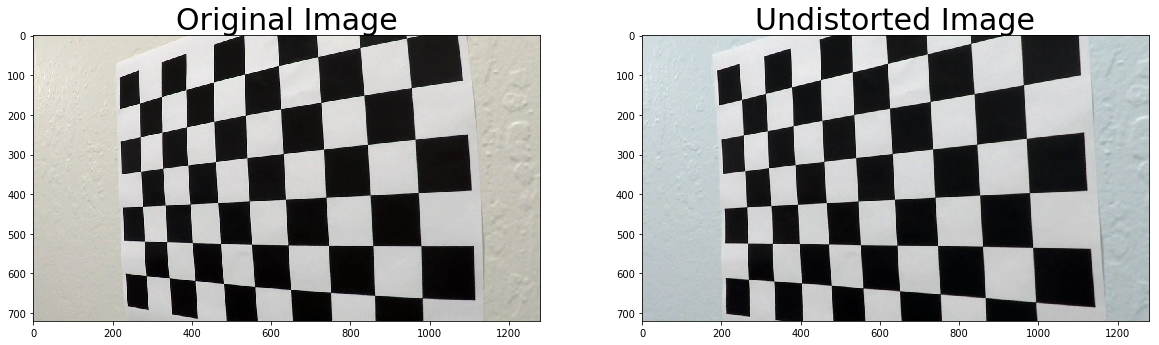

In [6]:
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    write_name = '/'.join([image_save_dir, 'undistored'+str(idx)+'.jpg'])
    mpimg.imsave(write_name,dst)

# sample visualization of an undistored image
idx = random.randint(0, len(images) - 1)
fname = '/'.join([image_save_dir, 'undistored'+str(idx)+'.jpg'])
test = mpimg.imread(fname)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

# Perspective Transform

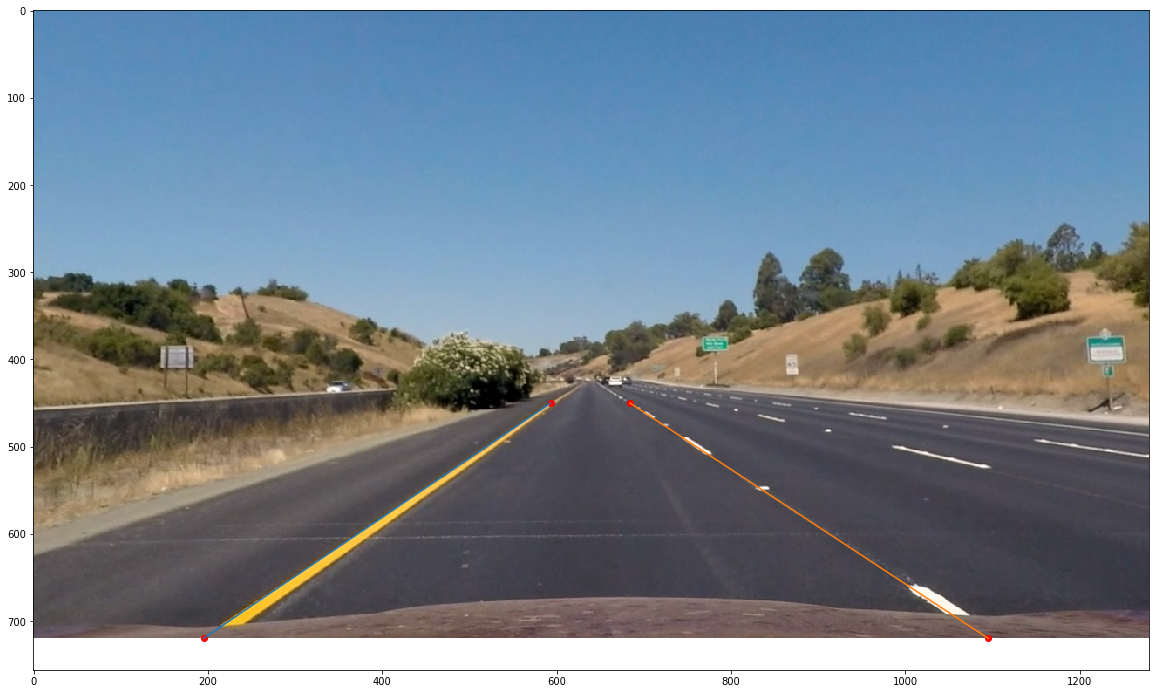

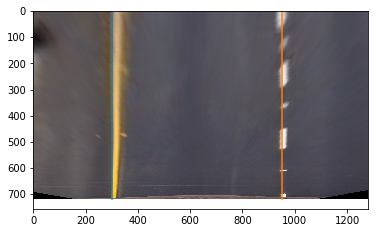

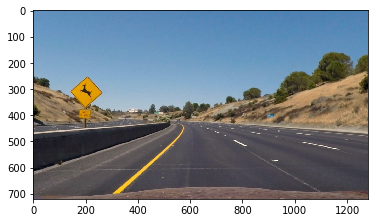

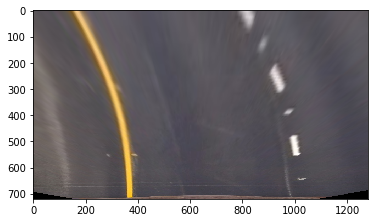

In [7]:
straight_image = mpimg.imread('test_images/straight_lines1.jpg')
straight_image = cv2.undistort(straight_image, mtx, dist, None, mtx)
plt.figure(figsize=(20,20))
plt.imshow(straight_image)

plt.plot(593, 450, 'ro')
plt.plot(684, 450, 'ro')
plt.plot(1095, 720, 'ro')
plt.plot(195, 720, 'ro')

plt.plot((195, 593), (720, 450))
plt.plot((1095, 684), (720, 450))

src = np.float32([[593, 450], [684, 450], [1095, 720], [195, 720]])
dst = np.float32([[300, 0], [950, 0], [950, 720], [300, 720]])

M = cv2.getPerspectiveTransform(src, dst)
MInv = cv2.getPerspectiveTransform(dst, src)
# Warp the image using OpenCV warpPerspective()
img_size = (straight_image.shape[1], straight_image.shape[0])
warped = cv2.warpPerspective(straight_image, M, img_size, flags=cv2.INTER_LINEAR)
plt.figure()
plt.imshow(warped)
plt.plot((300, 300), (0,720))
plt.plot((950, 950), (0,720))

mpimg.imsave('output_images/perspective_after_1.jpg', warped)

curved_image = mpimg.imread('test_images/test2.jpg')
curved_image = cv2.undistort(curved_image, mtx, dist, None, mtx)
plt.figure()
plt.imshow(curved_image)
warped = cv2.warpPerspective(curved_image, M, img_size, flags=cv2.INTER_LINEAR)
plt.figure()
plt.imshow(warped)
mpimg.imsave('output_images/perspective_after_2.jpg', warped)

In [8]:
"""Creates a binary image by applying the absolute sobel in the given direction

Keyword arguments:
img -- The image to process
sobel_kernel -- Kernel size
thresh -- Min/Max threshold parameters
"""
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    x = 0
    y = 0
    if orient == 'x':
        x = 1
    else:
        y=1
    sob = cv2.Sobel(gray, cv2.CV_64F, x,y)
    
    # 3) Take the absolute value of the derivative or gradient
    abs_sobel = np.absolute(sob)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255.0 * (abs_sobel/np.max(abs_sobel)))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
    binary_output = np.zeros(scaled_sobel.shape)
    binary_output[(scaled_sobel > thresh[0]) & (scaled_sobel < thresh[1])] = 1 
    # 6) Return this mask as your binary_output image

    return binary_output


"""Creates a binary image by applying the sobel magnitude

Keyword arguments:
img -- The image to process
sobel_kernel -- Kernel size
thresh -- Min/Max threshold parameters
"""
def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobel_x = cv2.Sobel(gray, cv2.CV_64F,1, 0, ksize=sobel_kernel)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F,0, 1, ksize=sobel_kernel)
    # 3) Calculate the magnitude 
    sobel_mag = np.sqrt((sobel_x ** 2) + (sobel_y ** 2))
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    sobel_scaled = np.uint8(255.0 * (sobel_mag/np.max(sobel_mag)))
    # 5) Create a binary mask where mag thresholds are met
    binary_output = np.zeros(sobel_scaled.shape)
    binary_output[(sobel_scaled > mag_thresh[0]) & (sobel_scaled < mag_thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    return binary_output


"""Creates a binary image by applying the directional sobel (angle between x and y sobel)

Keyword arguments:
img -- The image to process
sobel_kernel -- Kernel size
thresh -- Min/Max threshold parameters
"""
def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1
    
    return binary_output

"""Creates a binary image by thresholding the image in 
a) S channel of image converted to HSL
b) V channel of image converted to HSV

The pixel in the binary image is active if the thresholding criteria is met in S or V channels

Keyword arguments:
img -- The image to process
sobel_kernel -- Kernel size
thresh -- Min/Max threshold parameters
"""
def color_threshold(img, s_thresh=(0, 255), v_thresh=(0,255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel > s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    v_channel = hsv[:,:,2]
    v_binary = np.zeros_like(v_channel)
    v_binary[(v_channel > v_thresh[0]) & (v_channel <= v_thresh[1])] = 1
    
    binary_output = np.zeros_like(s_channel)
    binary_output[(v_binary == 1) & (s_binary == 1)] = 1
    return binary_output


# Lane Detection

In [9]:
"""Track the lanes detected in an image using window centroids method and annotate the images 
"""
class Tracker:
    
    
    """Constructor
    
    Keyword arguments:
    
    self -- this instance
    win_width -- window width to search for lane pixels
    win_height -- window height to search for lane pixels
    win_margin -- The margin applied to previously found centroids when searching for new centroids
    smoothing_factor -- Number of centroids to smooth over when returning output
    ym_px -- Meters to pixels ratio in y direction
    xm_px -- Meters to pixels ratio in x direction
    debug -- Print debug trace when true
    """
    def __init__(self, win_width = 25, win_height = 80, win_margin = 100, smoothing_factor=15, 
                 ym_px=30/720, xm_px=3.7/700,
                debug=False):
        
        # all the previous left/right window centers
        self.recent_centroids = []
        
        # count the pixels within the window to calculate curve values
        self.win_width = win_width
        
        # vertical slice of image
        self.win_height = win_height
        self.win_margin = win_margin
        self.smoothing_factor = smoothing_factor
        self.xm_px = xm_px
        self.ym_px = ym_px
        
        self.debug = debug
        
        self.prev_left_fit = None
        self.prev_right_fit = None
        
        if self.debug:
            print ("Debugging is ON")
    
    
    """Find window centroids as an approximation of lane points
    
    Keyword arguments:
    
    self -- this instance
    img -- Image to find window centroids in
    """
    def find_window_centroids(self, img):
        width = self.win_width
        height = self.win_height
        margin = self.win_margin
        
        img_h = img.shape[0]
        img_w = img.shape[1]
        
        window_centroids = [] # Store the (left,right) window centroid positions per level
        window = np.ones(width) # Create our window template that we will use for convolutions
    
        # First find the two starting positions for the left and right lane by using np.sum to get the vertical image slice
        # and then np.convolve the vertical image slice with the window template 
    
        # Sum quarter bottom of image to get slice, could use a different ratio
        img_mid_idx = int(img_w/2)
        img_three_fourth_idx = int(3 * img_h / 4) # bottom 1/4th rows
        
        offset = width/2     
        left_idx_start = 0
        left_idx_end = img_mid_idx
        
        right_idx_start = img_mid_idx
        right_idx_end = img_w
        
        # left quarter
        l_sum = np.sum(img[img_three_fourth_idx:,left_idx_start:left_idx_end], axis=0)
        # right quarter
        r_sum = np.sum(img[img_three_fourth_idx:,right_idx_start:right_idx_end], axis=0)
        
        # find centroids by convolution - convolution output size will be N+M-1
        # Use window_width/2 as offset because convolution signal reference is at right side of window, 
        # not center of window
        l_center = np.argmax(np.convolve(window,l_sum)) - offset
        r_center = np.argmax(np.convolve(window,r_sum)) - offset + right_idx_start
    
        # Add what we found for the first layer
        window_centroids.append((l_center,r_center))
    
        # Go through each vertical layer looking for max pixel locations
        for level in range(1,(int)(img_h/height)):
            if self.debug:
                print ("\nLevel {}:".format(level))
                
            # convolve the window into the vertical slice of the image
            image_layer = np.sum(img[int(img_h -(level+1)*height):int(img_h - level*height),:], axis=0)
            conv_signal = np.convolve(window, image_layer)

            # Find the best left centroid by using past left center as a reference
            # Use offset because convolution signal reference is at right side of window, 
            # not center of window
            l_min_index = int(max(l_center + offset - margin, 0))
            l_max_index = int(min(l_center + offset + margin, img_w))

            conv_left_max_idx = l_min_index + np.argmax(conv_signal[l_min_index:l_max_index])
            l_center =  conv_left_max_idx - offset
            
            # y value wrt to the previous frame polynomial
            if (conv_signal[conv_left_max_idx] < 18000): # TODO - tune this (20000)
                l_center = window_centroids[-1][0]
                print ("Threshold not met in left: {}".format(conv_signal[conv_left_max_idx]))

            # Find the best right centroid by using past right center as a reference
            r_min_index = int(max(r_center + offset - margin, 0))
            r_max_index = int(min(r_center + offset + margin, img_w))

            conv_right_max_idx = r_min_index + np.argmax(conv_signal[r_min_index:r_max_index])
            r_center =  conv_right_max_idx - offset
            if (conv_signal[conv_right_max_idx] < 18000): # TODO - tune this   
                r_center = window_centroids[-1][1]
                print ("Threshold not met in right: {}".format(conv_signal[conv_right_max_idx]))
            
            if self.debug:
                print ("Left Center: {}".format(l_center))
                print ("Left Max: {}".format(conv_signal[conv_left_max_idx]))
                print ("Right Center: {}".format(r_center))
                print ("Right Max: {}".format(conv_signal[conv_right_max_idx]))
                
            # Add what we found for that layer
            window_centroids.append((l_center,r_center))
        
        self.recent_centroids.append(window_centroids)
            
        return np.average(self.recent_centroids[-self.smoothing_factor:], axis=0)
    
    
    """Plot window centroids found in an image and save it
    
    Keyword arguments:
    self -- this instance
    img -- img to use for plotting
    window_centroids -- window centroids found for the image
    save_idx -- Save name suffix
    """
    def plot_window_centroids(self, img, window_centroids, save_idx):
        if len(window_centroids) == 0:
            print ("No window centroids available to plot")
            return
        
        # Points used to draw all the left and right centroid windows
        l_points = np.zeros_like(img)
        r_points = np.zeros_like(img)
        
        # Go through each level and draw the windows
        for level in range(0,len(window_centroids)):
            # Window_mask is a function to draw window areas
            lx = window_centroids[level][0]
            rx = window_centroids[level][1]
            l_mask = window_mask(window_width,window_height,img,lx,level)
            r_mask = window_mask(window_width,window_height,img,rx,level)
            # Add graphic points from window mask here to total pixels found 
            l_points[(l_points == 255) | ((l_mask == 1) ) ] = 255
            r_points[(r_points == 255) | ((r_mask == 1) ) ] = 255

        # Draw the results
        template = np.array(r_points + l_points, np.uint8) # add both left and right window pixels together
        zero_channel = np.zeros_like(template) # create a zero color channel
        template = np.array(cv2.merge((zero_channel,template,zero_channel)),np.uint8) # make window pixels green
        # making the original road pixels 3 color channels
        warpage = np.array(cv2.merge((img, img, img)),np.uint8) 
        output = cv2.addWeighted(warpage, 0.8, template, 1, 0.0) # overlay the original road image with window results
        
        write_name = '/'.join([image_save_dir, 'centroid'+str(save_idx)+'.jpg'])
        mpimg.imsave(write_name, output)

        
    """Fit a 2-nd order ploynomial in pixel and real world space to the window centroids found
    
    Keyword arguments:
    
    self -- this instance
    window_centroids -- window centroids (x coord)
    res_yvals -- Corresponding y values"""
    def fit_window_centroids(self, window_centroids, res_yvals):
        leftx = []
        rightx = []
        # Go through each level and draw the windows
        for level in range(0,len(window_centroids)):
            # Window_mask is a function to draw window areas
            lx = window_centroids[level][0]
            rx = window_centroids[level][1]
            leftx.append(lx)
            rightx.append(rx)

        left_fit = np.polyfit(res_yvals, leftx, 2)
        right_fit = np.polyfit(res_yvals, rightx, 2)
        
        left_fit_real = np.polyfit(np.array(res_yvals, np.float32) * self.ym_px, 
                                   np.array(leftx, np.float32) * self.xm_px, 2)
        right_fit_real = np.polyfit(np.array(res_yvals, np.float32) * self.ym_px, 
                                    np.array(rightx, np.float32) * self.xm_px, 2)
        
        return (left_fit, right_fit, left_fit_real, right_fit_real)
        
        
    """Annotate the image with the lanes found
    
    Keyword arguments:
    self -- this instance
    left_fit -- Polynomial of left lane in real space
    right_fit -- Polynomial of right lane in real space
    yvals -- Y values to use in real space
    """
    def polyfill_road(self, img, left_fit, right_fit, yvals):
        
        # get x points
        left_x = left_fit[0] *yvals*yvals + left_fit[1]*yvals + left_fit[2]
        left_x = np.array(left_x, np.int32)
        right_x = right_fit[0] *yvals*yvals + right_fit[1]*yvals + right_fit[2]
        right_x = np.array(right_x, np.int32)

        # pre-process to pass as input for fillPoly
        left_x_pts = np.concatenate((left_x - (window_width/2), left_x[::-1] + (window_width/2)), axis=0)
        right_x_pts = np.concatenate((right_x - (window_width/2), right_x[::-1] + (window_width/2)), axis=0)
        inner_x_pts = np.concatenate((left_x + (window_width/2), right_x[::-1] - (window_width/2)), axis=0)
        y_pts = np.concatenate((yvals, yvals[::-1]), axis=0)

        left_lane = np.array(list(zip(left_x_pts, y_pts)), np.int32)
        right_lane = np.array(list(zip(right_x_pts, y_pts)), np.int32)
        inner_lane = np.array(list(zip(inner_x_pts, y_pts)), np.int32)

        road = np.zeros_like(img)
        road_bkg = np.zeros_like(img)
        cv2.fillPoly(road, [left_lane], color=[255,0,0])
        cv2.fillPoly(road, [right_lane], color=[255,0,0])
        cv2.fillPoly(road, [inner_lane], color=[0,255,0])

        cv2.fillPoly(road_bkg, [left_lane], color=[255,255,255])
        cv2.fillPoly(road_bkg, [right_lane], color=[255,255,255])

        # create a high contrast annotation
        road_warped = cv2.warpPerspective(road, MInv, img_size, flags=cv2.INTER_LINEAR)
        road_warped_bkg = cv2.warpPerspective(road_bkg, MInv, img_size, flags=cv2.INTER_LINEAR)

        base = cv2.addWeighted(img, 1, road_warped_bkg, -1.0, 0.0)
        result = cv2.addWeighted(base, 1.0, road_warped, 1.0, 0.0)
        
        result = self.annotate_position(result, left_x[-1], right_x[-1])
        
        return result
        
    """Annotate the position of the vehicle on the image
    
    Keyword arguments:
    self -- this instance
    img -- Image to annotate
    lane_left -- Left lane position (x-coord)
    lane_right -- Right lane position (x-coord)
    """
    def annotate_position(self, img, lane_left, lane_right):
        # camera center
        camera_center = (lane_left + lane_right)/2
        center_diff = (camera_center - img.shape[1]/2) * xm_px

        pos = 'left'
        if center_diff > 0:
            pos = 'right'
            
        cv2.putText(img, "Vehicle Position: {:.2f} m {} of center.".format(abs(center_diff), pos), org=(50,75), 
                    fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255,255,255))
        
        return img
    
    
    """Annotate the radius of curvature of the lanes on the image.
    The curvature annotated is the average of left and right lanes
    
    Keyword arguments:
    self -- this instance
    img -- Image to annotate
    lane_left -- Left lane position (x-coord)
    lane_right -- Right lane position (x-coord)
    """
    def annotate_curvature(self, img, left_fit, right_fit):
        curve_y = img.shape[0]
        
        first_derv_left = (2 * left_fit[0] * curve_y * ym_px) + left_fit[1]
        second_derv_left = abs(2 * left_fit[0])
        
        first_derv_right = (2 * right_fit[0] * curve_y * ym_px) + right_fit[1]
        second_derv_right = abs(2 * right_fit[0])

        left_curv =  ((1 + first_derv_left  ** 2) ** (3/2)) / second_derv_left
        right_curv = ((1 + first_derv_right ** 2) ** (3/2)) / second_derv_right

        cv2.putText(img, "Radius of curvature: {:.2f} m.".format((right_curv+left_curv)/2), org=(50,50), 
                    fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255,255,255))
        
        return img
        
        
    """Process the given image by detecting lanes and annotating the image.
    
    Keyword arguments:
    self -- this instance
    warped -- Binary image in bird's eye view
    img -- Un-modified image
    save_idx -- Suffix to use when saving images
    """
    def process_image(self, warped, img, save_idx):
        window_centroids = self.find_window_centroids(warped)
        
        if self.debug:
            self.plot_window_centroids(warped, window_centroids, save_idx)
            
        yvals = np.arange(0, img.shape[0])
        # window centers
        res_yvals = np.arange(img.shape[0] - (window_height/2.0), 0, -window_height)
        
        (left_fit, right_fit, left_fit_real, right_fit_real) = \
        self.fit_window_centroids(window_centroids, res_yvals)
        
        self.prev_left_fit = left_fit
        self.prev_right_fit = right_fit
        
        result = self.polyfill_road(img, left_fit, right_fit, yvals)
        result = self.annotate_curvature(result, left_fit_real, right_fit_real)
        if self.debug:
            plt.figure()
            plt.imshow(result)
        
        return result


In [10]:
"""Creates a window mash of given dimensions

Keyword arguments:
width -- mask width
height -- msak height
img_ref -- Reference canvas
level -- Level/slice of the image to apply the mask on"""
def window_mask(width, height, img_ref, center, level):
    output = np.zeros_like(img_ref)
    output[int(img_ref.shape[0]-(level+1)*height):int(img_ref.shape[0]-level*height),max(0,int(center-width/2)):min(int(center+width/2),img_ref.shape[1])] = 1
    return output

In [11]:
import matplotlib

# parameters to set up Tracker
window_width=40
window_height=80
window_margin=100
smoothing_factor=11
xm_px = 3.7/700
ym_px = 30/720


"""Process the given image by passing it though the pipeline and annotate with the detected lanes"""
class ImageProcessor:
    
    """Constructor
    
    Keyword arguments:
    self -- this instance
    """
    def __init__(self):
        # create the tracker
        self.tracker = Tracker(window_width, window_height, window_margin, smoothing_factor, 
                               ym_px, xm_px, debug=False)
        # init the image save file name suffix
        self.save_idx = 0
        

    """Process the given image by passing it through the pipeline
    self -- this instance
    img -- Image to process
    do_save -- Image results at intermediate stages will be saved
    """
    def process(self, img, do_save=False):
        self.save_idx = self.save_idx + 1
        
        # 1) undistort
        dst = cv2.undistort(img, mtx, dist, None, mtx)
        if do_save:
            write_name = '/'.join([image_save_dir, 'undistorted_road'+str(self.save_idx)+'.jpg'])
            mpimg.imsave(write_name, dst)

        # 2) Apply each of the thresholding functions
        gradx = abs_sobel_thresh(dst, orient='x', sobel_kernel=3, thresh=(30, 255))
        grady = abs_sobel_thresh(dst, orient='y', sobel_kernel=3, thresh=(30, 255))
        mag_binary = mag_thresh(dst, sobel_kernel=9, mag_thresh=(50, 255))
        dir_binary = dir_threshold(dst, sobel_kernel=15, thresh=(0.7, 1.3))

        color_binary = color_threshold(dst, s_thresh=(100, 255), v_thresh=(100,255))

        combined_grad = np.zeros_like(dir_binary)
        combined_grad[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

        # Combine the two binary thresholds
        combined_binary = np.zeros_like(combined_grad)
        combined_binary[(combined_grad == 1) | (color_binary == 1)] = 255
        
        # 3) Warp to perspective view
        warped = cv2.warpPerspective(combined_binary, M, img_size, flags=cv2.INTER_LINEAR)
        if do_save:
            write_name = '/'.join([image_save_dir, 'threshold'+str(self.save_idx)+'.jpg'])
            mpimg.imsave(write_name, combined_binary, cmap=matplotlib.cm.gray)

            write_name = '/'.join([image_save_dir, 'warped'+str(self.save_idx)+'.jpg'])
            mpimg.imsave(write_name, warped, cmap=matplotlib.cm.gray)

        do_plotting = 0#random.randint(0,1)

        if do_plotting:
            # Stack each channel to view their individual contributions in green and blue respectively
            # This returns a stack of the two binary images, whose components you can see as different colors
            color_binary = np.dstack(( np.zeros_like(combined_grad), combined_grad, color_binary))

            # Plotting thresholded images
            plt.figure()
            f, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(20,10))
            ax1.set_title('Undistored Image')
            ax1.imshow(dst)
            ax2.set_title('Stacked thresholds')
            ax2.imshow(color_binary)

            ax3.set_title('Combined S channel and gradient thresholds')
            ax3.imshow(combined_binary, cmap='gray')

            ax4.set_title('Warped Image')
            ax4.imshow(warped, cmap='gray')

        # detect lanes and annotate
        result = self.tracker.process_image(warped, img, self.save_idx)

        if do_save:
            write_name = '/'.join([image_save_dir, "/road/", 'road'+str(self.save_idx)+'.jpg'])
            mpimg.imsave(write_name, result)

        return result

In [10]:
# run the pipeline for each test image
test_images = glob.glob('test_images/*.jpg')

for idx, fname in enumerate(test_images):
    img = mpimg.imread(fname)
    proc = ImageProcessor()
    proc.process(img, do_save=True)

Threshold not met in right: 0.0
Threshold not met in right: 0.0
Threshold not met in right: 0.0
Threshold not met in right: 0.0
Threshold not met in right: 4095.6884765625
Threshold not met in right: 14387.3291015625
Threshold not met in right: 11162.4755859375
Threshold not met in right: 0.0
Threshold not met in right: 0.0
Threshold not met in right: 9224.0771484375
Threshold not met in right: 0.0
Threshold not met in right: 13320.263671875
Threshold not met in right: 13596.6796875


In [12]:
from moviepy.editor import VideoFileClip

video_file = 'project_video.mp4'
output_video = 'annotated_project_video.mp4'
clip = VideoFileClip(video_file)
#clip = clip.subclip(30,50)
proc = ImageProcessor()
new_clip = clip.fl_image(proc.process)
new_clip.write_videofile(output_video, audio=False)

Threshold not met in right: 13891.5234375
[MoviePy] >>>> Building video annotated_project_video.mp4
[MoviePy] Writing video annotated_project_video.mp4


  0%|          | 1/1261 [00:00<14:51,  1.41it/s]

Threshold not met in right: 13891.5234375


  1%|          | 9/1261 [00:05<13:40,  1.53it/s]

Threshold not met in right: 16861.376953125


  1%|▏         | 17/1261 [00:11<13:32,  1.53it/s]

Threshold not met in right: 15853.0810546875


  2%|▏         | 22/1261 [00:14<14:02,  1.47it/s]

Threshold not met in right: 17039.4287109375
Threshold not met in right: 7391.7626953125


  2%|▏         | 26/1261 [00:17<13:37,  1.51it/s]

Threshold not met in right: 885.7763671875


  2%|▏         | 30/1261 [00:19<13:28,  1.52it/s]

Threshold not met in right: 15853.0810546875


  4%|▎         | 47/1261 [00:31<13:17,  1.52it/s]

Threshold not met in right: 15853.0810546875
Threshold not met in right: 15307.96875


  4%|▍         | 51/1261 [00:33<13:31,  1.49it/s]

Threshold not met in right: 1599.9755859375


  4%|▍         | 55/1261 [00:36<13:28,  1.49it/s]

Threshold not met in right: 15853.0810546875


  5%|▍         | 63/1261 [00:41<13:24,  1.49it/s]

Threshold not met in right: 3087.890625


  5%|▌         | 67/1261 [00:44<13:20,  1.49it/s]

Threshold not met in right: 15853.0810546875


  6%|▌         | 72/1261 [00:47<13:22,  1.48it/s]

Threshold not met in right: 17514.5654296875


  6%|▌         | 76/1261 [00:50<13:30,  1.46it/s]

Threshold not met in right: 15305.2294921875


  6%|▋         | 80/1261 [00:53<13:32,  1.45it/s]

Threshold not met in right: 15853.0810546875


  7%|▋         | 85/1261 [00:56<13:23,  1.46it/s]

Threshold not met in right: 15853.0810546875
Threshold not met in right: 17672.9443359375


  8%|▊         | 95/1261 [01:03<13:06,  1.48it/s]

Threshold not met in right: 17189.8388671875


  8%|▊         | 97/1261 [01:05<13:39,  1.42it/s]

Threshold not met in right: 15853.0810546875


  8%|▊         | 101/1261 [01:07<13:29,  1.43it/s]

Threshold not met in right: 3861.85546875


  8%|▊         | 105/1261 [01:10<13:38,  1.41it/s]

Threshold not met in right: 15853.0810546875


  9%|▊         | 110/1261 [01:14<13:14,  1.45it/s]

Threshold not met in right: 15853.0810546875
Threshold not met in right: 9279.609375


  9%|▉         | 114/1261 [01:17<13:22,  1.43it/s]

Threshold not met in right: 2247.685546875


  9%|▉         | 118/1261 [01:19<13:33,  1.41it/s]

Threshold not met in right: 15853.0810546875


 11%|█         | 139/1261 [01:34<13:09,  1.42it/s]

Threshold not met in right: 4610.1708984375


 11%|█▏        | 143/1261 [01:37<13:10,  1.41it/s]

Threshold not met in right: 15853.0810546875


 13%|█▎        | 168/1261 [01:55<13:01,  1.40it/s]

Threshold not met in right: 15853.0810546875
Threshold not met in right: 15697.1923828125


 14%|█▍        | 176/1261 [02:01<13:03,  1.38it/s]

Threshold not met in right: 13355.3759765625


 14%|█▍        | 180/1261 [02:04<13:13,  1.36it/s]

Threshold not met in right: 15853.0810546875


 15%|█▌        | 192/1261 [02:13<13:12,  1.35it/s]

Threshold not met in right: 15853.0810546875


 16%|█▌        | 201/1261 [02:20<13:22,  1.32it/s]

Threshold not met in right: 1938.3984375


 16%|█▋        | 205/1261 [02:23<13:30,  1.30it/s]

Threshold not met in right: 15853.0810546875


 17%|█▋        | 209/1261 [02:26<13:14,  1.32it/s]

Threshold not met in right: 15853.0810546875


 17%|█▋        | 217/1261 [02:32<13:04,  1.33it/s]

Threshold not met in right: 15853.0810546875


 18%|█▊        | 229/1261 [02:41<13:02,  1.32it/s]

Threshold not met in right: 15853.0810546875


 19%|█▉        | 242/1261 [02:50<12:40,  1.34it/s]

Threshold not met in right: 13919.4140625


 20%|██        | 254/1261 [03:00<12:39,  1.33it/s]

Threshold not met in right: 16728.896484375


 21%|██        | 266/1261 [03:09<14:33,  1.14it/s]

Threshold not met in right: 9959.1943359375


 21%|██▏       | 270/1261 [03:13<15:04,  1.10it/s]

Threshold not met in right: 15853.0810546875


 22%|██▏       | 278/1261 [03:20<15:11,  1.08it/s]

Threshold not met in right: 17530.0048828125
Threshold not met in right: 17453.3056640625


 22%|██▏       | 282/1261 [03:24<15:08,  1.08it/s]

Threshold not met in right: 16235.830078125


 23%|██▎       | 286/1261 [03:28<14:59,  1.08it/s]

Threshold not met in right: 14552.431640625


 23%|██▎       | 290/1261 [03:32<14:53,  1.09it/s]

Threshold not met in right: 15853.0810546875


 24%|██▍       | 302/1261 [03:43<14:53,  1.07it/s]

Threshold not met in right: 15853.0810546875


 24%|██▍       | 303/1261 [03:44<14:53,  1.07it/s]

Threshold not met in right: 14747.4169921875


 24%|██▍       | 306/1261 [03:46<14:45,  1.08it/s]

Threshold not met in right: 15853.0810546875


 27%|██▋       | 338/1261 [04:14<11:56,  1.29it/s]

Threshold not met in right: 16319.501953125
Threshold not met in right: 15430.48828125


 27%|██▋       | 342/1261 [04:17<11:23,  1.34it/s]

Threshold not met in right: 15853.0810546875


 27%|██▋       | 346/1261 [04:20<10:58,  1.39it/s]

Threshold not met in right: 15496.9775390625


 28%|██▊       | 350/1261 [04:22<10:59,  1.38it/s]

Threshold not met in right: 15853.0810546875


 28%|██▊       | 358/1261 [04:28<11:10,  1.35it/s]

Threshold not met in right: 3022.3974609375


 29%|██▊       | 362/1261 [04:31<11:03,  1.36it/s]

Threshold not met in right: 15853.0810546875


 29%|██▉       | 366/1261 [04:34<10:56,  1.36it/s]

Threshold not met in right: 17585.7861328125


 30%|██▉       | 374/1261 [04:40<11:00,  1.34it/s]

Threshold not met in right: 16108.5791015625


 30%|██▉       | 378/1261 [04:43<11:02,  1.33it/s]

Threshold not met in right: 15853.0810546875


 31%|███       | 386/1261 [04:49<11:06,  1.31it/s]

Threshold not met in right: 16664.6484375
Threshold not met in right: 14052.1435546875


 31%|███       | 394/1261 [04:55<10:58,  1.32it/s]

Threshold not met in right: 9312.2314453125


 32%|███▏      | 398/1261 [04:58<10:46,  1.33it/s]

Threshold not met in right: 15853.0810546875


 32%|███▏      | 406/1261 [05:04<10:45,  1.33it/s]

Threshold not met in right: 4957.3095703125


 33%|███▎      | 410/1261 [05:07<11:38,  1.22it/s]

Threshold not met in right: 15853.0810546875


 33%|███▎      | 418/1261 [05:13<10:50,  1.30it/s]

Threshold not met in right: 9513.69140625


 33%|███▎      | 422/1261 [05:17<10:49,  1.29it/s]

Threshold not met in right: 15853.0810546875


 34%|███▍      | 430/1261 [05:23<10:48,  1.28it/s]

Threshold not met in right: 1202.28515625


 34%|███▍      | 434/1261 [05:26<10:58,  1.26it/s]

Threshold not met in right: 15853.0810546875


 35%|███▍      | 438/1261 [05:29<10:48,  1.27it/s]

Threshold not met in right: 15853.0810546875


 35%|███▌      | 442/1261 [05:32<10:51,  1.26it/s]

Threshold not met in right: 8766.8701171875


 35%|███▌      | 446/1261 [05:35<10:40,  1.27it/s]

Threshold not met in right: 15853.0810546875


 36%|███▌      | 450/1261 [05:39<10:35,  1.28it/s]

Threshold not met in right: 15853.0810546875


 36%|███▌      | 454/1261 [05:42<10:35,  1.27it/s]

Threshold not met in right: 13039.86328125


 36%|███▋      | 458/1261 [05:45<10:27,  1.28it/s]

Threshold not met in right: 16350.87890625


 37%|███▋      | 462/1261 [05:48<10:25,  1.28it/s]

Threshold not met in right: 15853.0810546875


 37%|███▋      | 467/1261 [05:52<10:28,  1.26it/s]

Threshold not met in right: 9910.634765625


 37%|███▋      | 470/1261 [05:54<10:16,  1.28it/s]

Threshold not met in right: 10255.283203125


 38%|███▊      | 474/1261 [05:57<10:18,  1.27it/s]

Threshold not met in right: 17062.587890625


 38%|███▊      | 478/1261 [06:00<10:11,  1.28it/s]

Threshold not met in right: 1505.09765625


 38%|███▊      | 482/1261 [06:03<10:02,  1.29it/s]

Threshold not met in right: 15853.0810546875


 39%|███▊      | 486/1261 [06:07<10:50,  1.19it/s]

Threshold not met in right: 15853.0810546875


 39%|███▉      | 494/1261 [06:13<10:08,  1.26it/s]

Threshold not met in right: 9390.9228515625


 40%|███▉      | 502/1261 [06:21<11:50,  1.07it/s]

Threshold not met in right: 257.7392578125


 40%|███▉      | 503/1261 [06:22<11:53,  1.06it/s]

Threshold not met in right: 11286.73828125


 40%|████      | 506/1261 [06:25<11:50,  1.06it/s]

Threshold not met in right: 15853.0810546875


 40%|████      | 510/1261 [06:28<11:45,  1.07it/s]

Threshold not met in right: 15853.0810546875


 41%|████      | 514/1261 [06:32<11:42,  1.06it/s]

Threshold not met in right: 0.0


 41%|████      | 518/1261 [06:36<11:35,  1.07it/s]

Threshold not met in right: 15853.0810546875


 41%|████▏     | 522/1261 [06:40<11:34,  1.06it/s]

Threshold not met in right: 15853.0810546875


 42%|████▏     | 525/1261 [06:42<11:25,  1.07it/s]

Threshold not met in right: 2054.1943359375


 42%|████▏     | 526/1261 [06:43<11:28,  1.07it/s]

Threshold not met in right: 694.775390625
Threshold not met in right: 4129.306640625


 42%|████▏     | 527/1261 [06:44<11:37,  1.05it/s]

Threshold not met in right: 13463.203125
Threshold not met in right: 2055.6884765625


 42%|████▏     | 528/1261 [06:45<11:40,  1.05it/s]

Threshold not met in right: 4098.1787109375


 42%|████▏     | 530/1261 [06:47<11:39,  1.04it/s]

Threshold not met in right: 15853.0810546875
Threshold not met in right: 0.0


 42%|████▏     | 532/1261 [06:49<11:28,  1.06it/s]

Threshold not met in right: 0.0


 42%|████▏     | 533/1261 [06:50<11:25,  1.06it/s]

Threshold not met in right: 14948.6279296875
Threshold not met in right: 2058.427734375


 42%|████▏     | 534/1261 [06:51<11:25,  1.06it/s]

Threshold not met in right: 15853.0810546875
Threshold not met in right: 0.0


 42%|████▏     | 535/1261 [06:52<11:30,  1.05it/s]

Threshold not met in right: 2057.6806640625


 43%|████▎     | 536/1261 [06:53<11:33,  1.05it/s]

Threshold not met in right: 8233.7109375


 43%|████▎     | 537/1261 [06:54<11:27,  1.05it/s]

Threshold not met in right: 0.0


 43%|████▎     | 538/1261 [06:55<11:28,  1.05it/s]

Threshold not met in right: 14012.05078125
Threshold not met in right: 0.0


 43%|████▎     | 539/1261 [06:56<11:26,  1.05it/s]

Threshold not met in right: 17645.302734375
Threshold not met in right: 0.0


 43%|████▎     | 540/1261 [06:57<11:23,  1.05it/s]

Threshold not met in right: 11396.806640625


 43%|████▎     | 541/1261 [06:58<11:21,  1.06it/s]

Threshold not met in right: 0.0


 43%|████▎     | 542/1261 [06:59<11:19,  1.06it/s]

Threshold not met in right: 0.0
Threshold not met in right: 0.0


 43%|████▎     | 543/1261 [07:00<11:16,  1.06it/s]

Threshold not met in right: 15853.0810546875
Threshold not met in right: 14769.8291015625


 43%|████▎     | 544/1261 [07:00<11:16,  1.06it/s]

Threshold not met in right: 0.0


 43%|████▎     | 545/1261 [07:01<11:20,  1.05it/s]

Threshold not met in right: 11645.5810546875
Threshold not met in right: 0.0


 43%|████▎     | 546/1261 [07:02<11:23,  1.05it/s]

Threshold not met in right: 0.0
Threshold not met in right: 0.0


 43%|████▎     | 547/1261 [07:03<11:20,  1.05it/s]

Threshold not met in right: 103.095703125
Threshold not met in right: 2495.21484375


 43%|████▎     | 548/1261 [07:04<11:19,  1.05it/s]

Threshold not met in right: 0.0


 44%|████▎     | 549/1261 [07:05<11:22,  1.04it/s]

Threshold not met in right: 0.0


 44%|████▎     | 550/1261 [07:06<11:21,  1.04it/s]

Threshold not met in right: 15520.3857421875
Threshold not met in right: 0.0


 44%|████▎     | 551/1261 [07:07<11:26,  1.03it/s]

Threshold not met in right: 709.716796875
Threshold not met in right: 0.0


 44%|████▍     | 552/1261 [07:08<11:22,  1.04it/s]

Threshold not met in right: 0.0
Threshold not met in right: 0.0
Threshold not met in right: 4125.5712890625


 44%|████▍     | 553/1261 [07:09<11:22,  1.04it/s]

Threshold not met in right: 16386.9873046875
Threshold not met in right: 0.0
Threshold not met in right: 0.0


 44%|████▍     | 554/1261 [07:10<11:47,  1.00s/it]

Threshold not met in right: 15853.0810546875
Threshold not met in right: 0.0
Threshold not met in right: 0.0


 44%|████▍     | 555/1261 [07:11<11:43,  1.00it/s]

Threshold not met in right: 0.0
Threshold not met in right: 0.0
Threshold not met in right: 0.0
Threshold not met in right: 0.0


 44%|████▍     | 556/1261 [07:12<11:34,  1.02it/s]

Threshold not met in right: 5065.13671875
Threshold not met in right: 0.0


 44%|████▍     | 557/1261 [07:13<11:27,  1.02it/s]

Threshold not met in right: 4023.9697265625
Threshold not met in right: 0.0


 44%|████▍     | 558/1261 [07:14<10:40,  1.10it/s]

Threshold not met in right: 0.0
Threshold not met in right: 11533.0224609375


 44%|████▍     | 559/1261 [07:15<10:02,  1.17it/s]

Threshold not met in right: 6486.8115234375
Threshold not met in right: 6667.1044921875
Threshold not met in right: 0.0
Threshold not met in right: 0.0


 44%|████▍     | 560/1261 [07:15<09:35,  1.22it/s]

Threshold not met in right: 11492.6806640625
Threshold not met in right: 11929.4677734375
Threshold not met in right: 0.0
Threshold not met in right: 0.0


 44%|████▍     | 561/1261 [07:16<09:15,  1.26it/s]

Threshold not met in right: 11336.044921875
Threshold not met in right: 7683.369140625
Threshold not met in right: 0.0
Threshold not met in right: 0.0


 45%|████▍     | 562/1261 [07:17<08:59,  1.29it/s]

Threshold not met in right: 3688.7841796875
Threshold not met in right: 0.0
Threshold not met in right: 0.0
Threshold not met in right: 0.0


 45%|████▍     | 563/1261 [07:18<08:59,  1.29it/s]

Threshold not met in right: 14908.7841796875
Threshold not met in right: 0.0
Threshold not met in right: 0.0
Threshold not met in left: 4111.376953125


 45%|████▍     | 564/1261 [07:18<08:55,  1.30it/s]

Threshold not met in right: 0.0
Threshold not met in right: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0
Threshold not met in right: 0.0


 45%|████▍     | 565/1261 [07:19<08:45,  1.32it/s]

Threshold not met in right: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0
Threshold not met in right: 0.0
Threshold not met in left: 0.0


 45%|████▍     | 566/1261 [07:20<08:47,  1.32it/s]

Threshold not met in right: 273.427734375
Threshold not met in right: 3669.609375
Threshold not met in left: 0.0
Threshold not met in right: 15361.7578125
Threshold not met in left: 0.0
Threshold not met in left: 0.0


 45%|████▍     | 567/1261 [07:21<08:55,  1.30it/s]

Threshold not met in right: 0.0
Threshold not met in left: 0.0
Threshold not met in right: 2497.20703125
Threshold not met in left: 0.0
Threshold not met in left: 0.0
Threshold not met in right: 7859.4287109375


 45%|████▌     | 568/1261 [07:21<08:56,  1.29it/s]

Threshold not met in right: 0.0
Threshold not met in left: 7305.849609375
Threshold not met in left: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0
Threshold not met in right: 2058.427734375


 45%|████▌     | 569/1261 [07:22<08:50,  1.30it/s]

Threshold not met in right: 6794.1064453125
Threshold not met in left: 0.0
Threshold not met in right: 9956.2060546875
Threshold not met in left: 0.0
Threshold not met in left: 0.0
Threshold not met in right: 4460.2587890625


 45%|████▌     | 570/1261 [07:23<09:19,  1.24it/s]

Threshold not met in right: 4717.001953125
Threshold not met in right: 0.0
Threshold not met in left: 0.0
Threshold not met in right: 7493.8623046875
Threshold not met in left: 0.0
Threshold not met in left: 0.0
Threshold not met in right: 4130.302734375


 45%|████▌     | 571/1261 [07:24<09:51,  1.17it/s]

Threshold not met in right: 5104.2333984375
Threshold not met in right: 3672.3486328125
Threshold not met in left: 0.0
Threshold not met in right: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0


 45%|████▌     | 572/1261 [07:25<10:13,  1.12it/s]

Threshold not met in right: 5845.8251953125
Threshold not met in right: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0


 45%|████▌     | 573/1261 [07:26<10:27,  1.10it/s]

Threshold not met in right: 16787.4169921875
Threshold not met in right: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0
Threshold not met in right: 6141.9140625


 46%|████▌     | 574/1261 [07:27<10:32,  1.09it/s]

Threshold not met in right: 0.0
Threshold not met in left: 0.0
Threshold not met in right: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0
Threshold not met in right: 0.0


 46%|████▌     | 575/1261 [07:28<10:47,  1.06it/s]

Threshold not met in right: 0.0
Threshold not met in left: 0.0
Threshold not met in right: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0
Threshold not met in right: 0.0


 46%|████▌     | 576/1261 [07:29<10:49,  1.05it/s]

Threshold not met in right: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0
Threshold not met in right: 0.0
Threshold not met in left: 0.0
Threshold not met in right: 0.0


 46%|████▌     | 577/1261 [07:30<10:51,  1.05it/s]

Threshold not met in right: 17623.388671875
Threshold not met in right: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0
Threshold not met in right: 0.0
Threshold not met in left: 0.0


 46%|████▌     | 578/1261 [07:31<10:50,  1.05it/s]

Threshold not met in right: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0
Threshold not met in right: 0.0
Threshold not met in left: 0.0
Threshold not met in right: 0.0
Threshold not met in left: 0.0


 46%|████▌     | 579/1261 [07:32<10:52,  1.05it/s]

Threshold not met in right: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0
Threshold not met in right: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0


 46%|████▌     | 580/1261 [07:33<11:17,  1.00it/s]

Threshold not met in right: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0
Threshold not met in right: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0


 46%|████▌     | 581/1261 [07:34<11:12,  1.01it/s]

Threshold not met in right: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0
Threshold not met in right: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0


 46%|████▌     | 582/1261 [07:35<11:08,  1.02it/s]

Threshold not met in right: 0.0
Threshold not met in left: 0.0
Threshold not met in right: 204.697265625
Threshold not met in left: 0.0
Threshold not met in right: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0


 46%|████▌     | 583/1261 [07:36<11:07,  1.02it/s]

Threshold not met in right: 0.0
Threshold not met in left: 0.0
Threshold not met in right: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0


 46%|████▋     | 584/1261 [07:37<11:39,  1.03s/it]

Threshold not met in right: 5187.4072265625
Threshold not met in left: 0.0
Threshold not met in right: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0


 46%|████▋     | 585/1261 [07:38<11:17,  1.00s/it]

Threshold not met in right: 5577.626953125
Threshold not met in right: 13858.154296875
Threshold not met in left: 0.0
Threshold not met in right: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0


 46%|████▋     | 586/1261 [07:39<11:48,  1.05s/it]

Threshold not met in right: 15853.0810546875
Threshold not met in right: 0.0
Threshold not met in left: 0.0
Threshold not met in right: 17660.4931640625
Threshold not met in left: 0.0
Threshold not met in left: 0.0


 47%|████▋     | 587/1261 [07:40<11:54,  1.06s/it]

Threshold not met in right: 15853.0810546875
Threshold not met in right: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0


 47%|████▋     | 588/1261 [07:41<12:29,  1.11s/it]

Threshold not met in right: 16687.55859375
Threshold not met in right: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0


 47%|████▋     | 589/1261 [07:42<12:01,  1.07s/it]

Threshold not met in right: 15934.2626953125
Threshold not met in right: 2902.8662109375
Threshold not met in right: 0.0
Threshold not met in left: 7204.248046875
Threshold not met in left: 0.0
Threshold not met in left: 0.0
Threshold not met in right: 0.0


 47%|████▋     | 590/1261 [07:43<11:42,  1.05s/it]

Threshold not met in right: 0.0
Threshold not met in right: 0.0
Threshold not met in left: 6995.8154296875
Threshold not met in left: 0.0
Threshold not met in left: 0.0


 47%|████▋     | 591/1261 [07:44<12:05,  1.08s/it]

Threshold not met in right: 0.0
Threshold not met in right: 0.0
Threshold not met in left: 6995.56640625
Threshold not met in left: 0.0
Threshold not met in left: 0.0


 47%|████▋     | 592/1261 [07:46<12:10,  1.09s/it]

Threshold not met in right: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0


 47%|████▋     | 593/1261 [07:47<11:53,  1.07s/it]

Threshold not met in right: 4148.9794921875
Threshold not met in right: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 7382.7978515625
Threshold not met in right: 17032.20703125


 47%|████▋     | 594/1261 [07:48<11:32,  1.04s/it]

Threshold not met in right: 0.0
Threshold not met in right: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 14713.0517578125


 47%|████▋     | 595/1261 [07:49<11:17,  1.02s/it]

Threshold not met in right: 0.0
Threshold not met in left: 0.0
Threshold not met in left: 0.0


 47%|████▋     | 596/1261 [07:49<11:08,  1.01s/it]

Threshold not met in right: 5986.025390625
Threshold not met in left: 0.0
Threshold not met in left: 0.0


 47%|████▋     | 597/1261 [07:51<11:22,  1.03s/it]

Threshold not met in right: 15853.0810546875
Threshold not met in right: 8210.0537109375
Threshold not met in left: 0.0
Threshold not met in left: 0.0
Threshold not met in right: 4998.896484375


 47%|████▋     | 598/1261 [07:52<11:18,  1.02s/it]

Threshold not met in right: 15853.0810546875
Threshold not met in right: 0.0
Threshold not met in left: 0.0


 48%|████▊     | 599/1261 [07:53<11:37,  1.05s/it]

Threshold not met in right: 15853.0810546875
Threshold not met in right: 3688.53515625
Threshold not met in left: 0.0


 48%|████▊     | 600/1261 [07:54<11:23,  1.03s/it]

Threshold not met in right: 15853.0810546875
Threshold not met in left: 0.0
Threshold not met in right: 411.6357421875


 48%|████▊     | 601/1261 [07:55<11:00,  1.00s/it]

Threshold not met in right: 15853.0810546875
Threshold not met in left: 17647.0458984375
Threshold not met in right: 17585.7861328125


 48%|████▊     | 602/1261 [07:56<10:50,  1.01it/s]

Threshold not met in right: 15853.0810546875


 48%|████▊     | 603/1261 [07:57<10:42,  1.02it/s]

Threshold not met in right: 5570.9033203125


 48%|████▊     | 604/1261 [07:58<10:41,  1.02it/s]

Threshold not met in right: 0.0


 48%|████▊     | 606/1261 [07:59<10:31,  1.04it/s]

Threshold not met in right: 685.810546875


 48%|████▊     | 607/1261 [08:00<10:34,  1.03it/s]

Threshold not met in right: 16360.0927734375


 48%|████▊     | 609/1261 [08:02<10:40,  1.02it/s]

Threshold not met in right: 16077.94921875


 48%|████▊     | 610/1261 [08:03<10:40,  1.02it/s]

Threshold not met in right: 2987.783203125


 48%|████▊     | 611/1261 [08:04<10:35,  1.02it/s]

Threshold not met in right: 17482.1923828125


 49%|████▊     | 612/1261 [08:05<10:29,  1.03it/s]

Threshold not met in right: 15864.5361328125


 49%|████▊     | 613/1261 [08:06<10:32,  1.03it/s]

Threshold not met in right: 15853.0810546875


 49%|████▊     | 614/1261 [08:07<10:28,  1.03it/s]

Threshold not met in right: 5773.857421875


 49%|████▉     | 618/1261 [08:11<10:11,  1.05it/s]

Threshold not met in right: 15853.0810546875


 50%|████▉     | 626/1261 [08:19<09:58,  1.06it/s]

Threshold not met in left: 2047.7197265625


 50%|████▉     | 627/1261 [08:20<10:00,  1.06it/s]

Threshold not met in right: 16979.6630859375


 50%|████▉     | 629/1261 [08:22<09:55,  1.06it/s]

Threshold not met in right: 17230.1806640625


 50%|████▉     | 630/1261 [08:22<09:51,  1.07it/s]

Threshold not met in right: 15853.0810546875


 51%|█████     | 638/1261 [08:28<07:28,  1.39it/s]

Threshold not met in left: 4122.0849609375


 51%|█████     | 643/1261 [08:32<07:20,  1.40it/s]

Threshold not met in right: 16903.212890625
Threshold not met in right: 14030.478515625


 52%|█████▏    | 655/1261 [08:40<07:24,  1.36it/s]

Threshold not met in right: 15853.0810546875


 53%|█████▎    | 663/1261 [08:46<07:20,  1.36it/s]

Threshold not met in right: 15853.0810546875


 54%|█████▍    | 680/1261 [08:59<07:17,  1.33it/s]

Threshold not met in right: 16146.9287109375


 55%|█████▍    | 688/1261 [09:05<07:15,  1.32it/s]

Threshold not met in right: 17514.31640625


 55%|█████▍    | 692/1261 [09:08<07:17,  1.30it/s]

Threshold not met in right: 16843.6962890625


 55%|█████▌    | 696/1261 [09:11<07:09,  1.32it/s]

Threshold not met in right: 3530.9033203125


 56%|█████▌    | 700/1261 [09:14<07:00,  1.33it/s]

Threshold not met in right: 15853.0810546875


 56%|█████▌    | 708/1261 [09:20<07:05,  1.30it/s]

Threshold not met in right: 14554.1748046875


 56%|█████▋    | 712/1261 [09:23<06:57,  1.31it/s]

Threshold not met in right: 15853.0810546875


 57%|█████▋    | 725/1261 [09:33<06:54,  1.29it/s]

Threshold not met in right: 13338.4423828125


 58%|█████▊    | 728/1261 [09:36<06:55,  1.28it/s]

Threshold not met in right: 0.0
Threshold not met in right: 0.0
Threshold not met in right: 0.0
Threshold not met in right: 523.447265625


 60%|██████    | 761/1261 [10:01<06:27,  1.29it/s]

Threshold not met in right: 9398.3935546875


 61%|██████    | 765/1261 [10:04<06:30,  1.27it/s]

Threshold not met in right: 15853.0810546875


 61%|██████▏   | 773/1261 [10:10<06:23,  1.27it/s]

Threshold not met in right: 9639.4482421875


 62%|██████▏   | 785/1261 [10:20<06:20,  1.25it/s]

Threshold not met in right: 10519.248046875


 64%|██████▍   | 808/1261 [10:38<05:53,  1.28it/s]

Threshold not met in right: 17218.974609375


 65%|██████▍   | 816/1261 [10:45<05:50,  1.27it/s]

Threshold not met in right: 8826.884765625


 65%|██████▌   | 820/1261 [10:48<05:45,  1.27it/s]

Threshold not met in right: 16312.2802734375


 66%|██████▌   | 828/1261 [10:54<05:39,  1.28it/s]

Threshold not met in right: 12416.806640625


 66%|██████▋   | 836/1261 [11:01<05:36,  1.26it/s]

Threshold not met in right: 16382.0068359375


 67%|██████▋   | 840/1261 [11:04<05:47,  1.21it/s]

Threshold not met in right: 16000.25390625


 67%|██████▋   | 844/1261 [11:07<05:44,  1.21it/s]

Threshold not met in right: 16687.060546875


 67%|██████▋   | 845/1261 [11:08<05:37,  1.23it/s]

Threshold not met in right: 16158.134765625


 67%|██████▋   | 848/1261 [11:10<05:34,  1.24it/s]

Threshold not met in right: 15853.0810546875


 68%|██████▊   | 852/1261 [11:14<05:30,  1.24it/s]

Threshold not met in right: 742.3388671875


 68%|██████▊   | 856/1261 [11:17<05:27,  1.24it/s]

Threshold not met in right: 7175.859375


 68%|██████▊   | 860/1261 [11:20<05:21,  1.25it/s]

Threshold not met in right: 8210.5517578125


 69%|██████▉   | 867/1261 [11:26<05:16,  1.25it/s]

Threshold not met in right: 15853.0810546875


 69%|██████▉   | 868/1261 [11:27<05:12,  1.26it/s]

Threshold not met in right: 1499.12109375


 69%|██████▉   | 872/1261 [11:30<05:09,  1.26it/s]

Threshold not met in right: 826.259765625


 70%|██████▉   | 878/1261 [11:35<05:31,  1.16it/s]

Threshold not met in right: 17891.0888671875


 70%|██████▉   | 879/1261 [11:36<05:38,  1.13it/s]

Threshold not met in right: 15853.0810546875


 70%|██████▉   | 880/1261 [11:37<05:42,  1.11it/s]

Threshold not met in right: 3012.1875


 70%|██████▉   | 881/1261 [11:38<05:46,  1.10it/s]

Threshold not met in right: 14552.9296875


 70%|███████   | 883/1261 [11:39<05:46,  1.09it/s]

Threshold not met in right: 16705.2392578125


 70%|███████   | 884/1261 [11:40<05:47,  1.09it/s]

Threshold not met in right: 273.427734375


 70%|███████   | 887/1261 [11:43<05:49,  1.07it/s]

Threshold not met in right: 1602.216796875


 71%|███████   | 891/1261 [11:47<05:44,  1.07it/s]

Threshold not met in right: 17604.2138671875


 71%|███████   | 895/1261 [11:51<05:45,  1.06it/s]

Threshold not met in right: 15853.0810546875


 71%|███████▏  | 899/1261 [11:54<05:43,  1.06it/s]

Threshold not met in right: 84.66796875


 71%|███████▏  | 900/1261 [11:55<05:42,  1.06it/s]

Threshold not met in right: 14839.8046875


 72%|███████▏  | 903/1261 [11:58<05:33,  1.07it/s]

Threshold not met in right: 13783.447265625


 72%|███████▏  | 907/1261 [12:02<05:29,  1.07it/s]

Threshold not met in right: 15853.0810546875


 72%|███████▏  | 911/1261 [12:06<05:28,  1.06it/s]

Threshold not met in right: 14508.10546875


 73%|███████▎  | 915/1261 [12:09<05:24,  1.07it/s]

Threshold not met in right: 4171.3916015625


 73%|███████▎  | 919/1261 [12:13<05:21,  1.06it/s]

Threshold not met in right: 8048.4375


 73%|███████▎  | 926/1261 [12:20<05:16,  1.06it/s]

Threshold not met in right: 15853.0810546875


 74%|███████▍  | 934/1261 [12:27<05:08,  1.06it/s]

Threshold not met in right: 9227.314453125


 74%|███████▍  | 938/1261 [12:31<05:04,  1.06it/s]

Threshold not met in right: 15975.849609375


 75%|███████▍  | 942/1261 [12:34<04:19,  1.23it/s]

Threshold not met in right: 16064.7509765625


 75%|███████▌  | 946/1261 [12:37<04:01,  1.30it/s]

Threshold not met in right: 3006.9580078125


 75%|███████▌  | 950/1261 [12:40<03:51,  1.34it/s]

Threshold not met in right: 17996.42578125


 76%|███████▌  | 954/1261 [12:43<03:49,  1.33it/s]

Threshold not met in right: 16090.1513671875


 76%|███████▌  | 958/1261 [12:46<03:48,  1.33it/s]

Threshold not met in right: 14488.681640625


 76%|███████▋  | 962/1261 [12:49<03:44,  1.33it/s]

Threshold not met in right: 10025.68359375


 77%|███████▋  | 969/1261 [12:55<03:38,  1.34it/s]

Threshold not met in right: 16251.767578125


 77%|███████▋  | 972/1261 [12:57<03:40,  1.31it/s]

Threshold not met in right: 4143.75


 77%|███████▋  | 973/1261 [12:58<03:39,  1.31it/s]

Threshold not met in right: 15853.0810546875
Threshold not met in right: 0.0


 77%|███████▋  | 974/1261 [12:59<03:47,  1.26it/s]

Threshold not met in right: 0.0


 77%|███████▋  | 975/1261 [12:59<03:45,  1.27it/s]

Threshold not met in right: 11400.5419921875
Threshold not met in right: 0.0


 77%|███████▋  | 976/1261 [13:00<03:44,  1.27it/s]

Threshold not met in right: 0.0


 77%|███████▋  | 977/1261 [13:01<03:42,  1.28it/s]

Threshold not met in right: 0.0


 78%|███████▊  | 978/1261 [13:02<03:45,  1.25it/s]

Threshold not met in right: 0.0


 78%|███████▊  | 979/1261 [13:02<03:45,  1.25it/s]

Threshold not met in right: 0.0
Threshold not met in right: 0.0


 78%|███████▊  | 980/1261 [13:03<03:40,  1.28it/s]

Threshold not met in right: 0.0
Threshold not met in right: 7371.3427734375


 78%|███████▊  | 981/1261 [13:04<03:36,  1.29it/s]

Threshold not met in right: 0.0


 78%|███████▊  | 982/1261 [13:05<03:41,  1.26it/s]

Threshold not met in right: 3758.759765625
Threshold not met in right: 912.919921875
Threshold not met in right: 0.0


 78%|███████▊  | 983/1261 [13:06<03:42,  1.25it/s]

Threshold not met in right: 0.0
Threshold not met in right: 0.0


 78%|███████▊  | 984/1261 [13:06<03:38,  1.27it/s]

Threshold not met in right: 0.0
Threshold not met in right: 0.0


 78%|███████▊  | 985/1261 [13:07<03:36,  1.27it/s]

Threshold not met in right: 0.0
Threshold not met in right: 0.0


 78%|███████▊  | 986/1261 [13:08<03:41,  1.24it/s]

Threshold not met in right: 14384.58984375
Threshold not met in right: 9987.0849609375


 78%|███████▊  | 987/1261 [13:09<03:39,  1.25it/s]

Threshold not met in right: 143.1884765625


 78%|███████▊  | 988/1261 [13:10<03:36,  1.26it/s]

Threshold not met in right: 7341.9580078125
Threshold not met in right: 13771.7431640625
Threshold not met in right: 0.0


 78%|███████▊  | 989/1261 [13:11<03:51,  1.18it/s]

Threshold not met in right: 204.697265625
Threshold not met in right: 0.0


 79%|███████▊  | 990/1261 [13:12<03:57,  1.14it/s]

Threshold not met in right: 15718.6083984375
Threshold not met in right: 0.0
Threshold not met in right: 0.0


 79%|███████▊  | 991/1261 [13:13<04:04,  1.10it/s]

Threshold not met in right: 0.0
Threshold not met in right: 0.0


 79%|███████▊  | 992/1261 [13:13<04:07,  1.09it/s]

Threshold not met in right: 0.0
Threshold not met in right: 0.0
Threshold not met in right: 0.0


 79%|███████▊  | 993/1261 [13:14<04:13,  1.06it/s]

Threshold not met in right: 0.0
Threshold not met in right: 0.0


 79%|███████▉  | 994/1261 [13:15<04:11,  1.06it/s]

Threshold not met in right: 4349.94140625
Threshold not met in right: 15345.0732421875
Threshold not met in right: 7387.03125


 79%|███████▉  | 995/1261 [13:16<04:12,  1.05it/s]

Threshold not met in right: 0.0
Threshold not met in right: 0.0


 79%|███████▉  | 996/1261 [13:17<04:12,  1.05it/s]

Threshold not met in right: 0.0
Threshold not met in right: 0.0


 79%|███████▉  | 997/1261 [13:18<04:11,  1.05it/s]

Threshold not met in right: 0.0
Threshold not met in right: 0.0


 79%|███████▉  | 998/1261 [13:19<04:10,  1.05it/s]

Threshold not met in right: 15853.0810546875
Threshold not met in right: 0.0
Threshold not met in right: 12485.537109375


 79%|███████▉  | 999/1261 [13:20<04:08,  1.05it/s]

Threshold not met in right: 15853.0810546875
Threshold not met in right: 0.0
Threshold not met in right: 14916.2548828125


 79%|███████▉  | 1000/1261 [13:21<04:09,  1.04it/s]

Threshold not met in right: 0.0
Threshold not met in right: 8242.177734375


 79%|███████▉  | 1001/1261 [13:22<04:08,  1.05it/s]

Threshold not met in right: 0.0
Threshold not met in right: 0.0
Threshold not met in right: 8215.0341796875


 79%|███████▉  | 1002/1261 [13:23<04:08,  1.04it/s]

Threshold not met in right: 13506.533203125


 80%|███████▉  | 1003/1261 [13:24<04:09,  1.03it/s]

Threshold not met in right: 0.0
Threshold not met in right: 12540.5712890625


 80%|███████▉  | 1004/1261 [13:25<04:12,  1.02it/s]

Threshold not met in right: 15853.0810546875
Threshold not met in right: 0.0


 80%|███████▉  | 1005/1261 [13:26<04:17,  1.00s/it]

Threshold not met in right: 15853.0810546875
Threshold not met in right: 206.19140625
Threshold not met in right: 10272.4658203125


 80%|███████▉  | 1006/1261 [13:27<04:40,  1.10s/it]

Threshold not met in right: 11204.8095703125
Threshold not met in right: 13044.5947265625
Threshold not met in right: 0.0


 80%|███████▉  | 1007/1261 [13:29<04:48,  1.14s/it]

Threshold not met in right: 0.0


 80%|███████▉  | 1008/1261 [13:30<04:37,  1.10s/it]

Threshold not met in right: 0.0
Threshold not met in left: 9662.607421875


 80%|████████  | 1009/1261 [13:31<04:37,  1.10s/it]

Threshold not met in right: 5876.2060546875
Threshold not met in right: 0.0
Threshold not met in left: 0.0


 80%|████████  | 1010/1261 [13:32<04:24,  1.05s/it]

Threshold not met in right: 0.0
Threshold not met in right: 0.0
Threshold not met in left: 10288.154296875


 80%|████████  | 1011/1261 [13:33<04:18,  1.03s/it]

Threshold not met in right: 0.0
Threshold not met in right: 14916.2548828125


 80%|████████  | 1012/1261 [13:34<04:11,  1.01s/it]

Threshold not met in right: 15853.0810546875
Threshold not met in right: 0.0
Threshold not met in right: 0.0


 80%|████████  | 1013/1261 [13:35<04:12,  1.02s/it]

Threshold not met in right: 771.97265625
Threshold not met in right: 0.0
Threshold not met in right: 12484.04296875


 80%|████████  | 1014/1261 [13:36<04:12,  1.02s/it]

Threshold not met in right: 0.0
Threshold not met in right: 0.0


 80%|████████  | 1015/1261 [13:37<04:10,  1.02s/it]

Threshold not met in right: 0.0
Threshold not met in right: 0.0
Threshold not met in left: 11987.2412109375


 81%|████████  | 1016/1261 [13:38<04:08,  1.02s/it]

Threshold not met in right: 0.0


 81%|████████  | 1017/1261 [13:39<04:11,  1.03s/it]

Threshold not met in right: 0.0
Threshold not met in right: 0.0


 81%|████████  | 1018/1261 [13:40<04:08,  1.02s/it]

Threshold not met in right: 0.0
Threshold not met in right: 0.0
Threshold not met in left: 16666.640625


 81%|████████  | 1019/1261 [13:41<04:04,  1.01s/it]

Threshold not met in right: 0.0
Threshold not met in right: 13829.765625


 81%|████████  | 1020/1261 [13:42<03:57,  1.01it/s]

Threshold not met in right: 861.62109375
Threshold not met in right: 3858.8671875


 81%|████████  | 1021/1261 [13:43<04:00,  1.00s/it]

Threshold not met in right: 5615.478515625
Threshold not met in right: 3683.3056640625
Threshold not met in left: 0.0


 81%|████████  | 1022/1261 [13:44<03:57,  1.01it/s]

Threshold not met in right: 13373.5546875
Threshold not met in left: 7610.15625
Threshold not met in left: 0.0


 81%|████████  | 1023/1261 [13:45<03:53,  1.02it/s]

Threshold not met in left: 3802.8369140625
Threshold not met in left: 0.0


 81%|████████  | 1024/1261 [13:46<03:52,  1.02it/s]

Threshold not met in right: 16071.7236328125
Threshold not met in right: 15841.1279296875
Threshold not met in left: 2051.7041015625


 81%|████████▏ | 1025/1261 [13:47<03:51,  1.02it/s]

Threshold not met in right: 6013.6669921875
Threshold not met in left: 0.0
Threshold not met in left: 0.0


 81%|████████▏ | 1026/1261 [13:48<03:50,  1.02it/s]

Threshold not met in left: 0.0
Threshold not met in left: 0.0
Threshold not met in right: 0.0


 81%|████████▏ | 1027/1261 [13:49<03:49,  1.02it/s]

Threshold not met in right: 16095.6298828125
Threshold not met in left: 0.0
Threshold not met in left: 0.0
Threshold not met in right: 0.0
Threshold not met in left: 12869.7802734375


 82%|████████▏ | 1028/1261 [13:50<03:45,  1.03it/s]

Threshold not met in left: 0.0
Threshold not met in right: 7664.94140625


 82%|████████▏ | 1030/1261 [13:52<03:43,  1.03it/s]

Threshold not met in left: 14958.33984375


 82%|████████▏ | 1031/1261 [13:52<03:41,  1.04it/s]

Threshold not met in right: 7295.6396484375


 82%|████████▏ | 1033/1261 [13:55<03:53,  1.02s/it]

Threshold not met in right: 0.0


 82%|████████▏ | 1034/1261 [13:56<04:11,  1.11s/it]

Threshold not met in right: 0.0
Threshold not met in right: 0.0


 82%|████████▏ | 1036/1261 [13:59<05:18,  1.42s/it]

Threshold not met in right: 15853.0810546875
Threshold not met in right: 0.0


 82%|████████▏ | 1037/1261 [14:01<05:24,  1.45s/it]

Threshold not met in right: 15853.0810546875
Threshold not met in right: 0.0
Threshold not met in right: 15853.0810546875
Threshold not met in right: 3722.40234375
Threshold not met in right: 15323.6572265625


 82%|████████▏ | 1038/1261 [14:03<05:47,  1.56s/it]

Threshold not met in right: 9731.0888671875


 82%|████████▏ | 1039/1261 [14:04<05:54,  1.60s/it]

Threshold not met in right: 0.0


 82%|████████▏ | 1040/1261 [14:06<05:47,  1.57s/it]

Threshold not met in right: 11826.8701171875


 83%|████████▎ | 1041/1261 [14:08<05:52,  1.60s/it]

Threshold not met in right: 5854.04296875


 83%|████████▎ | 1044/1261 [14:12<05:47,  1.60s/it]

Threshold not met in right: 10123.30078125
Threshold not met in right: 15853.0810546875
Threshold not met in right: 15845.1123046875


 83%|████████▎ | 1046/1261 [14:16<06:31,  1.82s/it]

Threshold not met in right: 15853.0810546875
Threshold not met in right: 9488.7890625


 83%|████████▎ | 1047/1261 [14:18<06:08,  1.72s/it]

Threshold not met in right: 15853.0810546875


 83%|████████▎ | 1048/1261 [14:19<05:41,  1.60s/it]

Threshold not met in right: 15853.0810546875


 83%|████████▎ | 1049/1261 [14:21<05:26,  1.54s/it]

Threshold not met in right: 15853.0810546875
Threshold not met in right: 15853.0810546875


 84%|████████▍ | 1064/1261 [14:43<04:50,  1.47s/it]

Threshold not met in right: 2993.5107421875


 85%|████████▍ | 1066/1261 [14:46<04:51,  1.49s/it]

Threshold not met in right: 8739.7265625


 85%|████████▍ | 1068/1261 [14:49<04:38,  1.44s/it]

Threshold not met in right: 14602.236328125


 85%|████████▌ | 1072/1261 [14:55<04:33,  1.45s/it]

Threshold not met in right: 16202.7099609375


 86%|████████▌ | 1080/1261 [15:06<04:15,  1.41s/it]

Threshold not met in right: 15853.0810546875
Threshold not met in right: 84.66796875


 86%|████████▌ | 1084/1261 [15:12<04:24,  1.50s/it]

Threshold not met in right: 7902.7587890625


 86%|████████▋ | 1088/1261 [15:18<04:10,  1.45s/it]

Threshold not met in right: 15497.4755859375
Threshold not met in right: 11544.228515625


 87%|████████▋ | 1096/1261 [15:30<03:50,  1.40s/it]

Threshold not met in right: 9391.171875


 87%|████████▋ | 1103/1261 [15:39<03:31,  1.34s/it]

Threshold not met in right: 17811.8994140625


 88%|████████▊ | 1104/1261 [15:41<03:32,  1.35s/it]

Threshold not met in right: 0.0


 88%|████████▊ | 1105/1261 [15:42<03:31,  1.36s/it]

Threshold not met in right: 15421.7724609375


 88%|████████▊ | 1108/1261 [15:46<03:21,  1.32s/it]

Threshold not met in right: 8059.1455078125


 88%|████████▊ | 1111/1261 [15:50<03:15,  1.30s/it]

Threshold not met in right: 9150.3662109375


 88%|████████▊ | 1112/1261 [15:51<03:16,  1.32s/it]

Threshold not met in right: 17064.580078125


 89%|████████▊ | 1119/1261 [16:00<03:04,  1.30s/it]

Threshold not met in right: 12989.3115234375


 89%|████████▉ | 1123/1261 [16:06<03:01,  1.32s/it]

Threshold not met in right: 0.0


 89%|████████▉ | 1126/1261 [16:10<03:00,  1.34s/it]

Threshold not met in right: 15853.0810546875


 89%|████████▉ | 1127/1261 [16:11<02:59,  1.34s/it]

Threshold not met in right: 3745.3125


 89%|████████▉ | 1128/1261 [16:12<02:54,  1.32s/it]

Threshold not met in right: 712.20703125


 90%|████████▉ | 1130/1261 [16:16<03:41,  1.69s/it]

Threshold not met in right: 17821.3623046875


 90%|████████▉ | 1133/1261 [16:21<03:24,  1.60s/it]

Threshold not met in right: 5259.1259765625


 90%|█████████ | 1136/1261 [16:26<03:15,  1.56s/it]

Threshold not met in right: 16155.64453125


 91%|█████████ | 1145/1261 [16:39<02:47,  1.45s/it]

Threshold not met in right: 4767.802734375


 91%|█████████ | 1150/1261 [16:46<02:34,  1.39s/it]

Threshold not met in right: 15551.513671875


 91%|█████████▏| 1153/1261 [16:51<02:32,  1.41s/it]

Threshold not met in right: 17667.9638671875
Threshold not met in right: 17685.146484375


 92%|█████████▏| 1156/1261 [16:55<02:30,  1.43s/it]

Threshold not met in right: 0.0


 92%|█████████▏| 1160/1261 [17:01<02:25,  1.44s/it]

Threshold not met in right: 16131.4892578125


 92%|█████████▏| 1163/1261 [17:05<02:21,  1.45s/it]

Threshold not met in right: 16125.0146484375


 92%|█████████▏| 1164/1261 [17:07<02:24,  1.49s/it]

Threshold not met in right: 7405.458984375


 93%|█████████▎| 1167/1261 [17:11<02:13,  1.42s/it]

Threshold not met in right: 12696.2109375


 93%|█████████▎| 1168/1261 [17:12<02:11,  1.41s/it]

Threshold not met in right: 0.0


 93%|█████████▎| 1171/1261 [17:16<02:04,  1.39s/it]

Threshold not met in right: 15853.0810546875


 93%|█████████▎| 1179/1261 [17:29<02:07,  1.56s/it]

Threshold not met in right: 0.0


 94%|█████████▍| 1186/1261 [17:41<02:17,  1.83s/it]

Threshold not met in right: 12996.2841796875


 94%|█████████▍| 1189/1261 [17:47<02:08,  1.78s/it]

Threshold not met in right: 10898.5107421875


 94%|█████████▍| 1190/1261 [17:48<02:05,  1.77s/it]

Threshold not met in right: 11765.1123046875


 95%|█████████▍| 1194/1261 [17:55<01:57,  1.75s/it]

Threshold not met in right: 16307.2998046875


 95%|█████████▍| 1197/1261 [18:01<01:52,  1.75s/it]

Threshold not met in right: 8307.6708984375


 95%|█████████▌| 1199/1261 [18:04<01:48,  1.75s/it]

Threshold not met in right: 5106.474609375


 95%|█████████▌| 1201/1261 [18:08<01:43,  1.72s/it]

Threshold not met in right: 0.0


 95%|█████████▌| 1202/1261 [18:09<01:40,  1.70s/it]

Threshold not met in right: 7384.7900390625


 95%|█████████▌| 1204/1261 [18:12<01:35,  1.67s/it]

Threshold not met in right: 16435.7958984375


 96%|█████████▌| 1209/1261 [18:21<01:23,  1.61s/it]

Threshold not met in right: 16090.1513671875
Threshold not met in right: 11584.5703125


 96%|█████████▌| 1213/1261 [18:27<01:12,  1.51s/it]

Threshold not met in right: 3010.9423828125


 97%|█████████▋| 1217/1261 [18:33<01:10,  1.59s/it]

Threshold not met in right: 10242.83203125
Threshold not met in right: 12145.6201171875


 97%|█████████▋| 1223/1261 [18:43<00:59,  1.58s/it]

Threshold not met in right: 12370.7373046875


 97%|█████████▋| 1227/1261 [18:49<00:54,  1.62s/it]

Threshold not met in right: 4791.708984375


 97%|█████████▋| 1229/1261 [18:53<00:53,  1.67s/it]

Threshold not met in right: 852.9052734375


 98%|█████████▊| 1231/1261 [18:56<00:47,  1.60s/it]

Threshold not met in right: 0.0


 98%|█████████▊| 1234/1261 [19:00<00:42,  1.59s/it]

Threshold not met in right: 2819.443359375


 98%|█████████▊| 1235/1261 [19:02<00:42,  1.64s/it]

Threshold not met in right: 9899.9267578125


 98%|█████████▊| 1239/1261 [19:08<00:33,  1.53s/it]

Threshold not met in right: 14677.939453125
Threshold not met in right: 15446.6748046875


 99%|█████████▊| 1243/1261 [19:14<00:26,  1.47s/it]

Threshold not met in right: 15148.59375


 99%|█████████▉| 1250/1261 [19:25<00:16,  1.52s/it]

Threshold not met in right: 15537.568359375


 99%|█████████▉| 1253/1261 [19:30<00:13,  1.67s/it]

Threshold not met in right: 16574.7509765625


100%|█████████▉| 1260/1261 [19:40<00:01,  1.47s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: annotated_project_video.mp4 



In [ ]:
from moviepy.editor import VideoFileClip

video_file = 'project_video.mp4'
clip = VideoFileClip(video_file)

for i in range(1,61):
    tm = 25 + (i/10.0)
    clip.save_frame("test_images/frame{}.jpg".format(i), t=tm) # saves the first at t=29

In [ ]:
proc = ImageProcessor()
for idx in range(1, 61):
    fname = "test_images/frame{}.jpg".format(idx)
    print (fname)
    img = mpimg.imread(fname)
    
    proc.process(img, do_save=True)